In [1]:
import pandas as pd

In [70]:
us2020_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv"
us2020_cases = pd.read_csv(us2020_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])
us2021_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv"
us2021_cases = pd.read_csv(us2021_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [71]:
us2022_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv"
us2022_cases = pd.read_csv(us2022_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [73]:

recent_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
recent_cases = pd.read_csv(recent_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [74]:
us2020_cases.tail()

,date,county,state,cases,deaths
884732,2020-12-31,Sweetwater,Wyoming,2966,16.0
884733,2020-12-31,Teton,Wyoming,2138,4.0
884734,2020-12-31,Uinta,Wyoming,1558,7.0
884735,2020-12-31,Washakie,Wyoming,780,19.0
884736,2020-12-31,Weston,Wyoming,476,2.0


In [93]:
us2020_cases["deaths"] = us2020_cases["deaths"].fillna(0)
us2020_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [75]:
us2021_cases.tail()

,date,county,state,cases,deaths
1185368,2021-12-31,Sweetwater,Wyoming,8320,107.0
1185369,2021-12-31,Teton,Wyoming,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,1879,37.0
1185372,2021-12-31,Weston,Wyoming,1254,14.0


In [92]:
us2021_cases["deaths"] = us2021_cases["deaths"].fillna(0)
us2021_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [76]:
us2022_cases.tail()

,date,county,state,cases,deaths
1181525,2022-12-29,Sweetwater,Wyoming,12410,136.0
1181526,2022-12-29,Teton,Wyoming,12010,16.0
1181527,2022-12-29,Uinta,Wyoming,6305,43.0
1181528,2022-12-29,Washakie,Wyoming,2721,47.0
1181529,2022-12-29,Weston,Wyoming,1880,22.0


In [91]:
us2022_cases["deaths"] = us2022_cases["deaths"].fillna(0)
us2022_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [77]:
recent_cases.tail()

,date,county,state,cases,deaths
97578,2022-12-29,Sweetwater,Wyoming,12410,136.0
97579,2022-12-29,Teton,Wyoming,12010,16.0
97580,2022-12-29,Uinta,Wyoming,6305,43.0
97581,2022-12-29,Washakie,Wyoming,2721,47.0
97582,2022-12-29,Weston,Wyoming,1880,22.0


In [90]:
recent_cases["deaths"] = recent_cases["deaths"].fillna(0)
recent_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [63]:
#Population
population = pd.read_csv("data/popest2020-2022.csv", usecols=['STATE', 'NAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022'])

population = population.loc[population['STATE']!=0] #FILTER TO GET STATE ONLY
population = population.drop(columns=['STATE']) #DROP STATE NUMBER
population = population.rename(columns={"POPESTIMATE2020": "2020", "POPESTIMATE2021": "2021", "POPESTIMATE2022": "2022"})

population.head()

,NAME,2020,2021,2022
14,Alabama,5031362,5049846,5074296
15,Alaska,732923,734182,733583
16,Arizona,7179943,7264877,7359197
17,Arkansas,3014195,3028122,3045637
18,California,39501653,39142991,39029342


In [104]:
## Unpivot the data
date_columns = population.columns[1:]
id_vars_columns = population.columns[:1]
population_unpivoted = population.melt(id_vars=id_vars_columns, value_vars=date_columns, var_name='year', value_name='population')


In [105]:
population_unpivoted

,NAME,year,population
0,Alabama,2020,5031362
1,Alaska,2020,732923
2,Arizona,2020,7179943
3,Arkansas,2020,3014195
4,California,2020,39501653
...,...,...,...
151,Washington,2022,7785786
152,West Virginia,2022,1775156
153,Wisconsin,2022,5892539
154,Wyoming,2022,581381


In [106]:
# Save the DataFrame to a CSV file
population_unpivoted.to_csv('data/estimated_population.csv', index=False)

In [107]:
pop_df = pd.read_csv('data/estimated_population.csv')
pop_df.head()

,NAME,year,population
0,Alabama,2020,5031362
1,Alaska,2020,732923
2,Arizona,2020,7179943
3,Arkansas,2020,3014195
4,California,2020,39501653


In [108]:
pop_df.isna().sum()

NAME          0
year          0
population    0
dtype: int64

In [129]:
us2020_date = us2020_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2020_state = us2020_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2021_date = us2021_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2021_state = us2021_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2022_date = us2022_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2022_state = us2022_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()


In [130]:
us_date_df = pd.concat([us2020_date, us2021_date, us2022_date])
us_state_df = pd.concat([us2020_state, us2021_state, us2022_state])

In [145]:
us_state_df

,date,state,cases,deaths,year
0,2020-01-21,Washington,1,0.0,2020
1,2020-01-22,Washington,1,0.0,2020
2,2020-01-23,Washington,1,0.0,2020
3,2020-01-24,Illinois,1,0.0,2020
4,2020-01-24,Washington,1,0.0,2020
...,...,...,...,...,...
20323,2022-12-29,Virginia,2202436,22793.0,2022
20324,2022-12-29,Washington,1883676,15067.0,2022
20325,2022-12-29,West Virginia,624174,7786.0,2022
20326,2022-12-29,Wisconsin,1959643,15858.0,2022


In [146]:
us_date_df ['date'] = pd.to_datetime(us_date_df['date'])
us_state_df ['date'] = pd.to_datetime(us_state_df['date'])

In [147]:
#add year column
us_state_df['year'] = us_state_df['date'].dt.year
us_date_df['year'] = us_date_df['date'].dt.year




In [148]:
df_merged = pd.merge(us_state_df, pop_df, left_on=['year', 'state'], right_on=['year', 'NAME'], how='left')
df_merged.drop('NAME', axis=1, inplace=True)

In [149]:
df_merged.tail()

,date,state,cases,deaths,year,population
57238,2022-12-29,Virginia,2202436,22793.0,2022,8683619.0
57239,2022-12-29,Washington,1883676,15067.0,2022,7785786.0
57240,2022-12-29,West Virginia,624174,7786.0,2022,1775156.0
57241,2022-12-29,Wisconsin,1959643,15858.0,2022,5892539.0
57242,2022-12-29,Wyoming,182847,1959.0,2022,581381.0


In [150]:
#generate case fatality rate (CFR) columns
df_merged["cfr"] = df_merged["deaths"]/df_merged["cases"]

#generate Attack rate
df_merged["attack rate"] = df_merged["cases"]/df_merged["population"]

In [151]:
df_merged.tail()

,date,state,cases,deaths,year,population,cfr,attack rate
57238,2022-12-29,Virginia,2202436,22793.0,2022,8683619.0,0.010349,0.253631
57239,2022-12-29,Washington,1883676,15067.0,2022,7785786.0,0.007999,0.241938
57240,2022-12-29,West Virginia,624174,7786.0,2022,1775156.0,0.012474,0.351616
57241,2022-12-29,Wisconsin,1959643,15858.0,2022,5892539.0,0.008092,0.332563
57242,2022-12-29,Wyoming,182847,1959.0,2022,581381.0,0.010714,0.314505


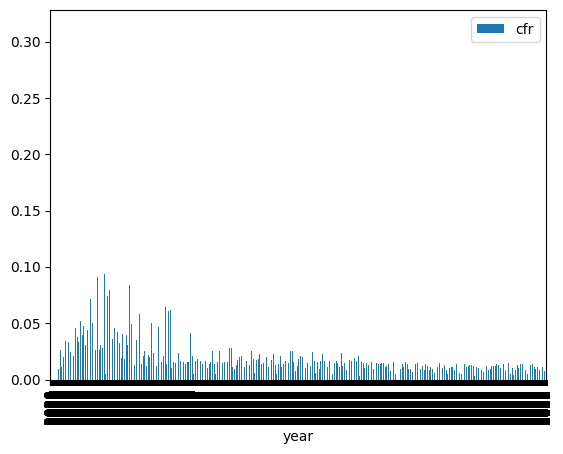

In [153]:
import matplotlib.pyplot as plt

# Select the 'Year' and 'Sales' columns
dff = df_merged[['year', 'cfr']]

# Plot the 'Year' and 'Sales' columns
dff.plot(kind='bar', x='year', y='cfr')

# Show the plot
plt.show()

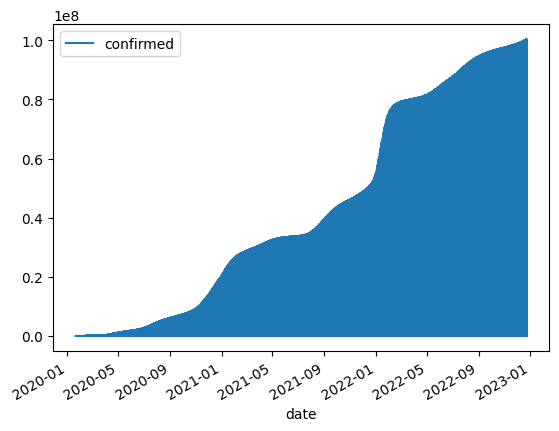

In [32]:
# Select the 'Year' and 'Sales' columns
dff1 = df[['date', 'confirmed']]

# Plot the 'Year' and 'Sales' columns
dff1.plot(x='date', y='confirmed')

# Show the plot
plt.show()

In [ ]:
country_sum_by_date_df = df.groupby(["date","Country/Region"])[["confirmed","death","recovered","active"]].sum().reset_index()

In [ ]:
country_sum_by_date_df.tail()

,date,Country/Region,confirmed,death,recovered,active
214462,9/9/22,West Bank and Gaza,702591,5706,0.0,696885.0
214463,9/9/22,Winter Olympics 2022,535,0,0.0,535.0
214464,9/9/22,Yemen,11932,2155,0.0,9777.0
214465,9/9/22,Zambia,333204,4017,0.0,329187.0
214466,9/9/22,Zimbabwe,256859,5596,0.0,251263.0


# Data to show

In [21]:
#Last update date
last_update= df["date"].iloc[-1].strftime('%Y-%m-%d')
last_update

'2022-12-23'